In [72]:
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [2]:
columns = [
    "responder_id", "birth_year", "gender", "industry_desc", "occupation_desc",
    "organization_size", "manage_others", "household", "years_at_job",
    "metro_or_regional", "rw_percentage_2020", "org_encouraged_rw",
    "org_prepared_for_rw", "rw_is_common_at_org", "rw_permission_is_attainable",
    "rw_collaboration_easy", "preferred_rw_percentage_2020", "preferred_rw_percentage_future",
    "if_no_covid_employer_encourage_rw", "if_no_covid_employer_support_rw",
    "if_no_covid_i_would_have_choice_about_rw", "productivity_remote_vs_office",
    "inperson_hours__commuting", "inperson_hours__working", "inperson_hours__personal_family_time",
    "inperson_hours_domestic_responsibilities", "remote_hours_commuting", "remote_hours_working",
    "remote_hours_personal_family_time", "remote_hours_domestic_responsibilities",
    "commute_time_difference"
]


In [4]:
file_path = Path('/content/merged_df_cleaned_040323.csv')
df = pd.read_csv(file_path)
df = df.loc[:, columns].copy()


In [15]:
respondents_df = df[[
    "responder_id", "birth_year", "gender", "occupation_desc", "household", "years_at_job"
]]

organization_df = df[[
    "responder_id", "industry_desc", "organization_size", "manage_others",
    "org_encouraged_rw", "org_prepared_for_rw", "rw_is_common_at_org",
    "rw_permission_is_attainable", "rw_collaboration_easy",
    "if_no_covid_employer_encourage_rw", "if_no_covid_employer_support_rw",
    "if_no_covid_i_would_have_choice_about_rw"
]]

time_mgmt_df = df[[
    "responder_id", "rw_percentage_2020", "preferred_rw_percentage_2020", "preferred_rw_percentage_future",
    "productivity_remote_vs_office",
    "inperson_hours__commuting", "inperson_hours__working", "inperson_hours__personal_family_time",
    "inperson_hours_domestic_responsibilities", "remote_hours_commuting", "remote_hours_working",
    "remote_hours_personal_family_time", "remote_hours_domestic_responsibilities", "commute_time_difference"
]]


In [8]:
time_mgmt_df

,responder_id,rw_percentage_2020,preferred_rw_percentage_2020,preferred_rw_percentage_future,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities,commute_time_difference
0,0,4-5 days,4-5 days,4-5 days,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,1.5
1,1,1-2 days,1-2 days,1-2 days,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,2.0
2,2,2-3 days,3-4 days,3-4 days,less productive,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0,1.0
3,3,4-5 days,4-5 days,4-5 days,same productivity,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0,1.0
4,4,4-5 days,4-5 days,3-4 days,more productive,1.0,8.0,3.5,2.0,0.0,6.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,3014,1-2 days,2-3 days,1-2 days,much more productive,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0,-1.0
3015,3015,0-1 days,0-1 days,0-1 days,same productivity,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0,2.0
3016,3016,0-1 days,4-5 days,4-5 days,same productivity,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0,2.0
3017,3017,0-1 days,0-1 days,0-1 days,same productivity,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0,0.5


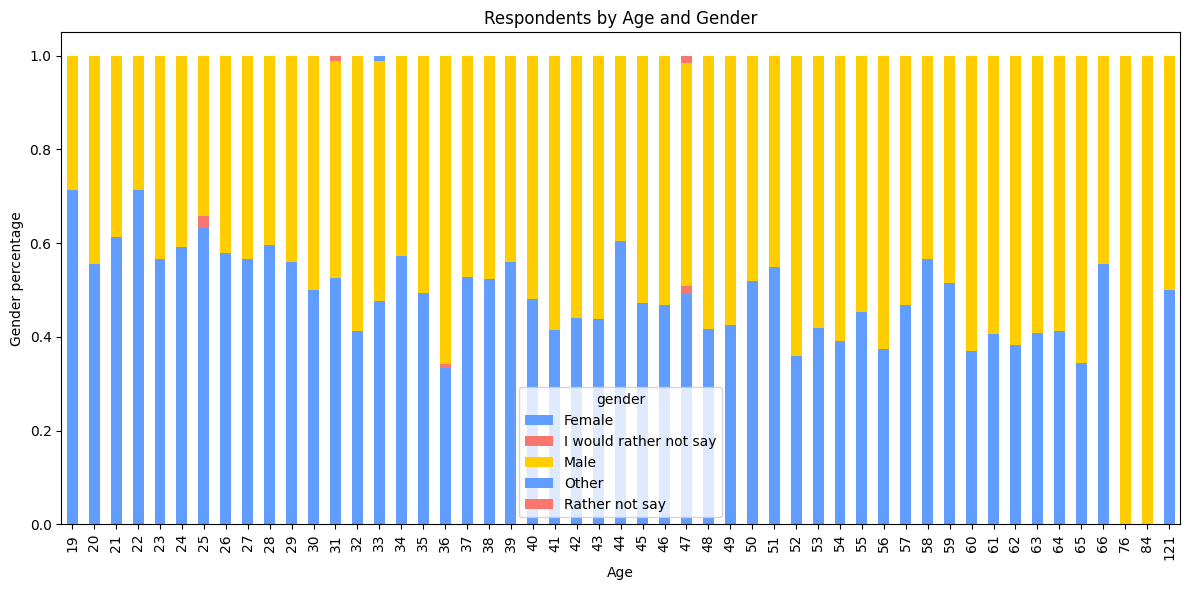

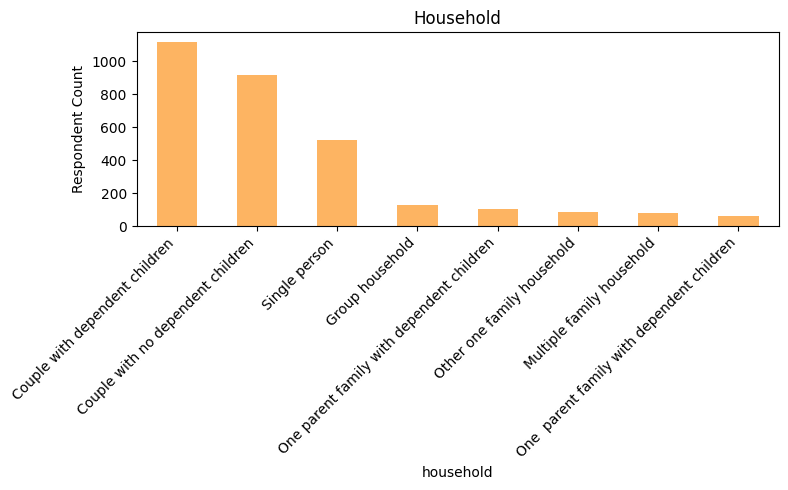

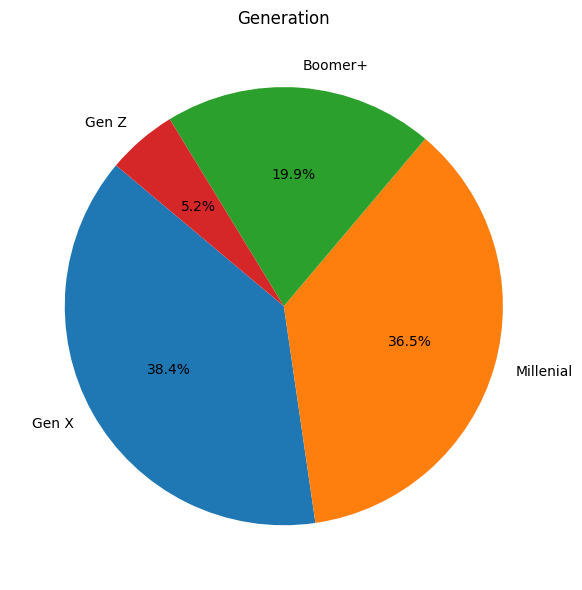

3019

In [73]:

df = pd.read_csv("/content/merged_df_cleaned_040323.csv")


df['age'] = 2021 - df['birth_year']
df['generation'] = pd.cut(df['age'],
                          bins=[0, 25, 40, 56, 100],
                          labels=['Gen Z', 'Millenial', 'Gen X', 'Boomer+'])

# 1. Gender distribution by age (stacked area-like bar)
gender_age_dist = df.groupby(['age', 'gender']).size().unstack().fillna(0)
gender_age_percent = gender_age_dist.divide(gender_age_dist.sum(axis=1), axis=0)

gender_age_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=["#619CFF", "#F8766D", "#FFCD00"])
plt.title("Respondents by Age and Gender")
plt.ylabel("Gender percentage")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# 2. Household composition bar chart
plt.figure(figsize=(8, 5))
df['household'].value_counts().plot(kind='bar', color='#FDB462')
plt.title("Household")
plt.ylabel("Respondent Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Generation pie chart
plt.figure(figsize=(6, 6))
df['generation'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Generation")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 4. Respondent count total
respondent_count = len(df)
respondent_count




1. A total of 3,019 people took part in the two-year remote-work survey.
2. Millennials and Gen X made up the bulk of respondents, while Gen Z was under-represented, reflecting their newer entry into the workforce.
3. The gender split was nearly even: 1,570 identified as male and 1,443 as female (with 6 preferring not to say).
4. The average age hovered in the 40–45 range. Younger cohorts skewed more female, but as age rose, men outnumbered women.
5. A clear majority of participants were in partnerships with dependent children, and those family responsibilities shaped how they allocated the extra time saved by working remotely.

/tmp/ipython-input-23-3779443006.py:24: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



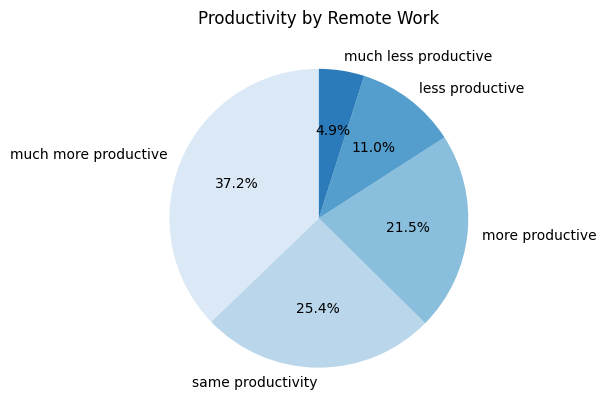

/tmp/ipython-input-23-3779443006.py:48: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-23-3779443006.py:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




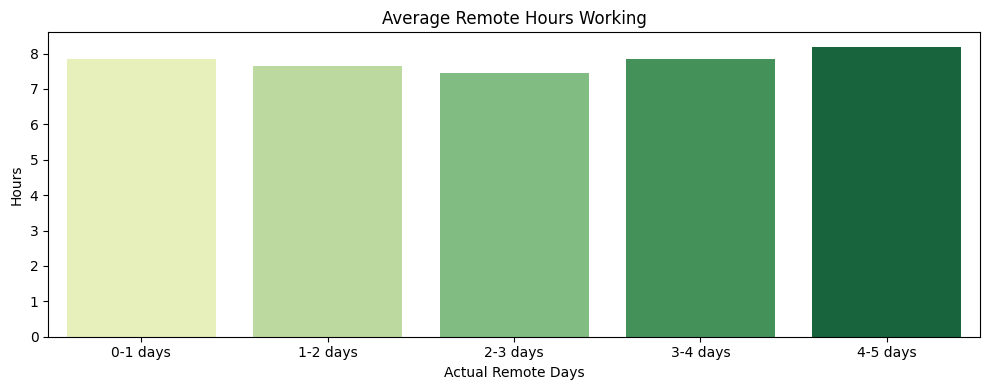

/tmp/ipython-input-23-3779443006.py:70: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




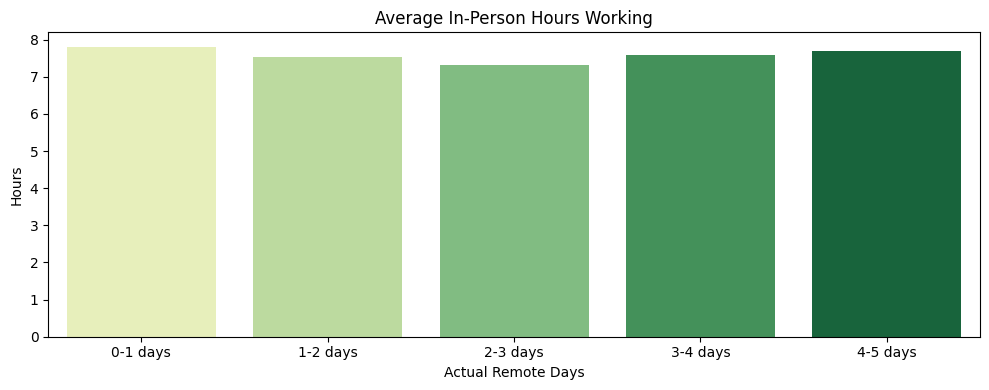

/tmp/ipython-input-23-3779443006.py:79: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




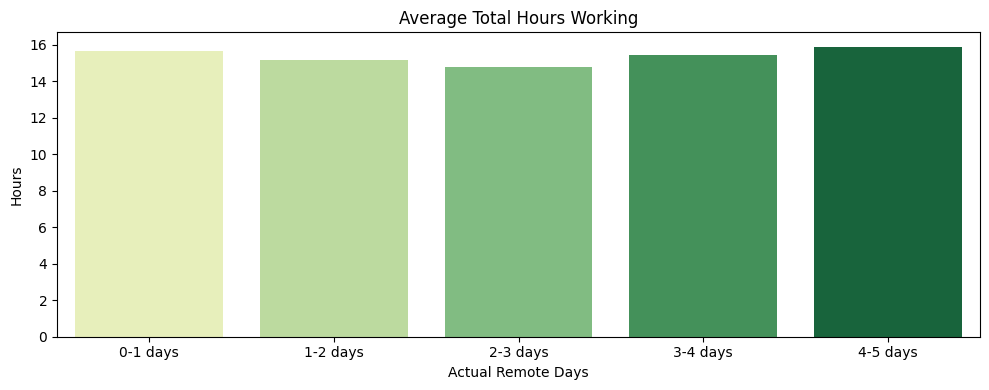

In [23]:
merged_df = pd.read_csv(file_path)

# Standardize and convert remote percentage to float
remote_day_map = {
    "0-1 days": 0.2,
    "1-2 days": 0.4,
    "2-3 days": 0.6,
    "3-4 days": 0.8,
    "4-5 days": 1.0,
    "None": 0.0,
    "N/A": 0.0
}

merged_df['rw_percentage_2020'] = (
    merged_df['rw_percentage_2020']
    .astype(str)
    .str.strip()
    .replace(remote_day_map)
    .astype(float)
)

# Calculate age
merged_df['age'] = 2021 - merged_df['birth_year']

# Create bins for remote working days
merged_df['actual_remote_days'] = pd.cut(
    merged_df['rw_percentage_2020'],
    bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=["0-1 days", "1-2 days", "2-3 days", "3-4 days", "4-5 days"]
)

# ---- PIE CHART: Productivity Comparison ----
plt.figure(figsize=(6, 6))
merged_df['productivity_remote_vs_office'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues"))
plt.title("Productivity by Remote Work")
plt.ylabel("")
plt.tight_layout()
plt.show()

# ---- BAR CHARTS: Remote / In-person / Total Hours by Remote Days ----
grouped_hours = merged_df.groupby('actual_remote_days').agg({
    'remote_hours_working': 'mean',
    'inperson_hours__working': 'mean'
}).dropna()

grouped_hours['total_hours_working'] = grouped_hours['remote_hours_working'] + grouped_hours['inperson_hours__working']
grouped_hours = grouped_hours.reset_index()

# Set color palette
colors = sns.color_palette("YlGn", n_colors=5)

# Remote Hours
plt.figure(figsize=(10, 4))
sns.barplot(x='actual_remote_days', y='remote_hours_working', data=grouped_hours, palette=colors)
plt.title("Average Remote Hours Working")
plt.ylabel("Hours")
plt.xlabel("Actual Remote Days")
plt.tight_layout()
plt.show()

# In-Person Hours
plt.figure(figsize=(10, 4))
sns.barplot(x='actual_remote_days', y='inperson_hours__working', data=grouped_hours, palette=colors)
plt.title("Average In-Person Hours Working")
plt.ylabel("Hours")
plt.xlabel("Actual Remote Days")
plt.tight_layout()
plt.show()

# Total Hours
plt.figure(figsize=(10, 4))
sns.barplot(x='actual_remote_days', y='total_hours_working', data=grouped_hours, palette=colors)
plt.title("Average Total Hours Working")
plt.ylabel("Hours")
plt.xlabel("Actual Remote Days")
plt.tight_layout()
plt.show()


In [26]:
from ipywidgets import interact, RadioButtons


day_map = {"0-1 days":0.1, "1-2 days":0.3, "2-3 days":0.5, "3-4 days":0.7, "4-5 days":0.9}
df['rw_pct'] = df['rw_percentage_2020'].map(day_map).fillna(pd.to_numeric(
    df['rw_percentage_2020'].astype(str)
    .str.replace('%','',regex=False), errors='coerce'
)/100)


df['actual_remote_days'] = pd.cut(
    df['rw_pct'],
    bins=[-0.1,0.2,0.4,0.6,0.8,1.0],
    labels=["0-1 days","1-2 days","2-3 days","3-4 days","4-5 days"]
)

df['age'] = 2021 - df['birth_year']
def gen_of(year):
    if year >= 1997: return 'Gen Z'
    if year >= 1981: return 'Millennial'
    if year >= 1965: return 'Gen X'
    return 'Boomer+'
df['generation'] = df['birth_year'].apply(gen_of)


def plot_hybrid_config(gen):
    # filter
    if gen != 'All':
        d = df[df['generation']==gen]
    else:
        d = df
    # aggregate
    grp = d.groupby('actual_remote_days').agg({
        'remote_hours_working':'mean',
        'inperson_hours__working':'mean'
    }).dropna()
    grp['total_hours'] = grp['remote_hours_working'] + grp['inperson_hours__working']
    grp = grp.reindex(["0-1 days","1-2 days","2-3 days","3-4 days","4-5 days"])  # ensure order

    # plot
    fig, axes = plt.subplots(3,1,figsize=(10,12), sharex=True)
    sns.barplot(x=grp.index, y=grp['remote_hours_working'], ax=axes[0], palette='Greens')
    axes[0].set_title('Avg. Remote Hours Working'); axes[0].set_ylabel('Hours')
    sns.barplot(x=grp.index, y=grp['inperson_hours__working'], ax=axes[1], palette='Greens')
    axes[1].set_title('Avg. In-Person Hours Working'); axes[1].set_ylabel('Hours')
    sns.barplot(x=grp.index, y=grp['total_hours'], ax=axes[2], palette='Greens')
    axes[2].set_title('Avg. Total Hours Working'); axes[2].set_ylabel('Hours')
    plt.suptitle(f"Best Hybrid Configurations — Generation: {gen}", y=0.92, fontsize=16)
    plt.xlabel('Actual Remote Days')
    plt.tight_layout()
    plt.show()


generation_selector = RadioButtons(
    options=['All','Boomer+','Gen X','Millennial','Gen Z'],
    description='Generation:'
)
interact(plot_hybrid_config, gen=generation_selector)


interactive(children=(RadioButtons(description='Generation:', options=('All', 'Boomer+', 'Gen X', 'Millennial'…

<function __main__.plot_hybrid_config(gen)>

1. When we break out productivity by generation, every age group reports higher productivity when working remotely. Millennials lead the way—more of them say they’re “more productive” at home than any other cohort. While most Baby Boomers also feel more productive remotely, a larger share of boomers report “same productivity” compared to younger groups, suggesting they’re less swayed by the work environment.

2. Across all generations, the majority rate themselves as “more productive” when remote. Millennials and Gen Xers show the strongest remote‐productivity boost, whereas Boomers are more evenly split between gains and no change.

3. On average, remote workers log more hours than their office‐based counterparts. Millennials put in the most hours when they’re fully remote (4–5 days a week), while Baby Boomers actually see their highest hour total when they’re only remote 0–1 days per week.

In [42]:
from scipy.interpolate import make_interp_spline

#  Convert and clamp commute_time_difference
df['commute_time_difference'] = pd.to_numeric(df['commute_time_difference'], errors='coerce')
df = df[df['commute_time_difference'].between(0, 4)].copy()  # keep 0–4 hrs

#  Auto‐detect your 3 remote / 3 in‐person columns
remote_cols = sorted([c for c in df if c.startswith('remote_hours')])[:3]
inperson_cols = sorted([c for c in df if c.startswith('inperson_hours')])[:3]
print("Remote:", remote_cols)
print("In-Person:", inperson_cols)

#  Ensure numeric
for c in remote_cols + inperson_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

#  Build the plotting function
def plot_commute_impact(industries, occupations):
    d = df.copy()
    if industries:
        d = d[d['industry_desc'].isin(industries)]
    if occupations:
        d = d[d['occupation_desc'].isin(occupations)]

    # Aggregate at each commute_time_difference
    grp = (
        d.groupby('commute_time_difference')[remote_cols + inperson_cols]
         .mean()
         .reset_index()
         .sort_values('commute_time_difference')
    )

    # Spline‐smooth
    x   = grp['commute_time_difference'].values
    x_s = np.linspace(x.min(), x.max(), 200)
    sm  = {}
    for col in remote_cols + inperson_cols:
        spl     = make_interp_spline(x, grp[col].values, k=3)
        sm[col] = spl(x_s)

    # a) Line chart
    plt.figure(figsize=(12,5))
    # Remote = thick
    plt.plot(x_s, sm[remote_cols[0]], color='darkred',   lw=2, label='Work (R)')
    plt.plot(x_s, sm[remote_cols[1]], color='darkblue',  lw=2, label='Personal/Family (R)')
    plt.plot(x_s, sm[remote_cols[2]], color='darkgreen', lw=2, label='Domestic (R)')
    # In-Person = thin
    plt.plot(x_s, sm[inperson_cols[0]], color='salmon',     lw=1.5, label='Work (I)')
    plt.plot(x_s, sm[inperson_cols[1]], color='skyblue',    lw=1.5, label='Personal/Family (I)')
    plt.plot(x_s, sm[inperson_cols[2]], color='lightgreen', lw=1.5, label='Domestic (I)')

    # Inline labels
    for col, txt, colr in zip(
        remote_cols,
        ["Working", "Personal/Family Time", "Domestic Responsibilities"],
        ['darkred','darkblue','darkgreen']
    ):
        plt.text(x_s[-1]+0.05, sm[col][-1], txt, color=colr, va='center')

    plt.title("Commute Time Saved Impact")
    plt.xlabel("Daily Commuting Time Saved (Hours)")
    plt.ylabel("Daily Time Spent (Hours)")
    plt.xlim(0, 4.5)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # b) Pie charts of actual avg hours
    remote_avg   = grp[remote_cols].mean()
    inperson_avg = grp[inperson_cols].mean()
    total_r = remote_avg.sum()
    total_i = inperson_avg.sum()

    fig, axes = plt.subplots(1,2,figsize=(10,4))
    axes[0].pie(
        remote_avg,
        labels=[f"{lbl.replace('remote_hours_','').replace('_',' ').title()} ({h:.1f}h)"
                for lbl,h in zip(remote_avg.index, remote_avg.values)],
        autopct=None,
        colors=['darkred','darkblue','darkgreen']
    )
    axes[0].set_title(f"Avg Hours Spent (Remote)\nTotal: {total_r:.1f}h")

    axes[1].pie(
        inperson_avg,
        labels=[f"{lbl.replace('inperson_hours_','').replace('_',' ').title()} ({h:.1f}h)"
                for lbl,h in zip(inperson_avg.index, inperson_avg.values)],
        autopct=None,
        colors=['salmon','skyblue','lightgreen']
    )
    axes[1].set_title(f"Avg Hours Spent (In-Person)\nTotal: {total_i:.1f}h")

    plt.tight_layout()
    plt.show()

#  Interactive filters
industry_opts   = df['industry_desc'].dropna().unique().tolist()
occupation_opts = df['occupation_desc'].dropna().unique().tolist()

interact(
    plot_commute_impact,
    industries=SelectMultiple(options=industry_opts,   value=[], description="Industry"),
    occupations=SelectMultiple(options=occupation_opts, value=[], description="Occupation")
)


Remote: ['remote_hours_commuting', 'remote_hours_domestic_responsibilities', 'remote_hours_personal_family_time']
In-Person: ['inperson_hours__commuting', 'inperson_hours__personal_family_time', 'inperson_hours__working']


interactive(children=(SelectMultiple(description='Industry', options=('Other', 'Professional, Scientific and T…

<function __main__.plot_commute_impact(industries, occupations)>

Employees who saved more than three hours a day by not commuting reclaimed not only work time but also personal and family time. Those extra hours at home were split between productive tasks and family activities. As a result, companies effectively gained additional labor hours from their remote‐working staff.











In [68]:
import re

#  Load
df = pd.read_csv('/content/merged_df_cleaned_040323.csv')

#  Recode remote-days categories
day_mapping = {
    "0-1 days": 0.5, "1-2 days": 1.5, "2-3 days": 2.5,
    "3-4 days": 3.5, "4-5 days": 4.5, "5 days": 5.0
}
df['rw_days'] = df['rw_percentage_2020'].map(day_mapping)
df['rw_pct']  = df['rw_days'] / 5.0

#  Numeric conversions
df['remote_hours_working']    = pd.to_numeric(df['remote_hours_working'],   errors='coerce')
df['inperson_hours__working'] = pd.to_numeric(df['inperson_hours__working'], errors='coerce')
df['birth_year']              = pd.to_numeric(df['birth_year'],            errors='coerce')

#  Derive Generation
def gen_of(y):
    if y >= 1997: return 'Gen Z'
    if y >= 1981: return 'Millennial'
    if y >= 1965: return 'Gen X'
    return 'Boomer+'
df['generation'] = df['birth_year'].apply(gen_of)

#  Compute per-employee monthly & bonus hours (20 workdays/mo)
WORKDAYS = 20
df['monthly_remote']   = df['remote_hours_working']  * df['rw_pct'] * WORKDAYS
df['monthly_inperson'] = df['inperson_hours__working'] * (1 - df['rw_pct']) * WORKDAYS
df['bonus_monthly']    = df['monthly_remote'] - df['monthly_inperson']

#  Filter controls
industry_opts   = df['industry_desc'].dropna().unique().tolist()
occupation_opts = df['occupation_desc'].dropna().unique().tolist()
generation_opts = ['All','Boomer+','Gen X','Millennial','Gen Z']

def plot_org_bonus(industry_filter, occupation_filter, gen_filter):
    d = df.copy()
    if industry_filter:
        d = d[d['industry_desc'].isin(industry_filter)]
    if occupation_filter:
        d = d[d['occupation_desc'].isin(occupation_filter)]
    if gen_filter!='All':
        d = d[d['generation']==gen_filter]
    if d.empty:
        print(" No data.")
        return

    # a) Organ‐size buckets sorted
    buckets = d['organization_size'].dropna().unique().tolist()
    buckets.sort(key=lambda s: int(re.search(r'\d+', s).group())
                 if re.search(r'\d+', s) else float('inf'))
    buckets = buckets[:4]

    # b) Bonus line (per employee)
    bonus_by_org = d.groupby('organization_size')['bonus_monthly']\
                    .mean().reindex(buckets).dropna()
    if bonus_by_org.empty:
        print("No bonus")
        return

    plt.figure(figsize=(8,3))
    plt.plot(bonus_by_org.index, bonus_by_org.values, '-o', color='steelblue')
    for x,y in zip(bonus_by_org.index, bonus_by_org.values):
        plt.text(x, y, f"{y:.2f}", ha='center', va='bottom')
    plt.title("Bonus Remote Work Hours/Month (Per Employee)")
    plt.xlabel("Organization Size")
    plt.ylabel("Avg. Bonus Hours")
    plt.ylim(0, np.nanmax(bonus_by_org.values)*1.1)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    # c) Org of 200+ (per‐employee → org‐total)
    ORG_SIZE = 200
    largest = buckets[-1]   # "More than 200"
    d200    = d[d['organization_size']==largest]
    if d200.empty:
        print(f"No data'{largest}'.")
        return

    # per‐employee averages
    avg_i = d200['monthly_inperson'].mean()
    avg_r = d200['monthly_remote'].mean()

    # multiply by 200 employees for total
    total_i = avg_i * ORG_SIZE
    total_r = avg_r * ORG_SIZE
    bonus   = total_r - total_i

    # plot bars (hours)
    fig, ax = plt.subplots(1,2, figsize=(10,3), sharey=True)
    ax[0].bar(['In-Person'], [total_i], color='salmon')
    ax[0].set_title(f"{largest}\nTotal Monthly In-Person Hours (200 emp)")
    ax[0].text(0, total_i*1.02, f"{total_i:.1f}h", ha='center')

    ax[1].bar(['Remote'], [total_r], color='darkgreen')
    ax[1].set_title(f"{largest}\nTotal Monthly Remote Hours (200 emp)")
    ax[1].text(0, total_r*1.02, f"{total_r:.1f}h", ha='center')

    plt.suptitle(f"Org of 200 Employees – Monthly Totals", y=1.05)
    plt.tight_layout()
    plt.show()

    print(f"▶️ Org of 200: Worked Hours Gained (Monthly): {bonus:.1f}h")

#  Launch interactive dashboard
interact(
    plot_org_bonus,
    industry_filter   = SelectMultiple(options=industry_opts,   value=[], description="Industry"),
    occupation_filter = SelectMultiple(options=occupation_opts, value=[], description="Occupation"),
    gen_filter        = RadioButtons(options=generation_opts,    value='All',   description="Generation")
)


interactive(children=(SelectMultiple(description='Industry', options=('Other', 'Professional, Scientific and T…

<function __main__.plot_org_bonus(industry_filter, occupation_filter, gen_filter)>

In [71]:
# Clean / cast the remote‐work and productivity columns

df['rw_pct_cat']   = df['rw_percentage_2020']
df['pref_pct_cat'] = df['preferred_rw_percentage_future']
df['prod_cat']     = df['productivity_remote_vs_office']

# Cast birth_year and derive generation
df['birth_year'] = pd.to_numeric(df['birth_year'], errors='coerce')
def gen_of(y):
    if y >= 1997: return 'Gen Z'
    if y >= 1981: return 'Millennial'
    if y >= 1965: return 'Gen X'
    return 'Boomer+'
df['generation'] = df['birth_year'].apply(gen_of)

#  Define the ordering of the categories
day_order  = ["0-1 days","1-2 days","2-3 days","3-4 days","4-5 days","No response"]
prod_order = ["much less productive",
              "less productive",
              "same productivity",
              "more productive",
              "much more productive",
              "No response"]

#  Build widget option lists (now generation exists!)
industry_opts   = ["(All)"] + df['industry_desc'].dropna().unique().tolist()
occupation_opts = ["(All)"] + df['occupation_desc'].dropna().unique().tolist()
gender_opts     = ["(All)"] + df['gender'].dropna().unique().tolist()
generation_opts = ["(All)"] + df['generation'].dropna().unique().tolist()
prod_opts       = ["(All)"] + prod_order

#  The plotting function
def plot_prod_heatmaps(industry, occupation, gender, generation, prod_filter):
    d = df.copy()
    if industry    != "(All)": d = d[d['industry_desc'] == industry]
    if occupation  != "(All)": d = d[d['occupation_desc'] == occupation]
    if gender      != "(All)": d = d[d['gender'] == gender]
    if generation  != "(All)": d = d[d['generation'] == generation]
    if d.empty:
        print("No data")
        return

    # Highlight column?
    highlight = prod_filter if prod_filter != "(All)" else None

    # Actual remote days vs productivity
    act = pd.crosstab(d['rw_pct_cat'], d['prod_cat'])
    act = act.reindex(index=day_order, columns=prod_order).fillna(0)
    act = act.div(act.sum(axis=1), axis=0)

    # Preferred remote days vs productivity
    pref = pd.crosstab(d['pref_pct_cat'], d['prod_cat'])
    pref = pref.reindex(index=day_order, columns=prod_order).fillna(0)
    pref = pref.div(pref.sum(axis=1), axis=0)

    # Pie of preferred
    pie = d['pref_pct_cat'].value_counts().reindex(day_order).fillna(0)

    # Plot
    fig, axes = plt.subplots(3,1, figsize=(10,12),
                             gridspec_kw={'height_ratios':[1,1,0.6]})

    sns.heatmap(act,  ax=axes[0], cmap="Blues", cbar=False, linewidths=0.5, linecolor='white')
    axes[0].set(title="Relative Productivity by Actual Number of Remote Days",
                xlabel="", ylabel="Actual Remote Days")

    sns.heatmap(pref, ax=axes[1], cmap="Blues", cbar=False, linewidths=0.5, linecolor='white')
    axes[1].set(title="Relative Productivity by Preferred Number of Remote Days",
                xlabel="", ylabel="Preferred Remote Days")

    # Highlight if requested
    if highlight:
        ci = prod_order.index(highlight)
        for ax in axes[:2]:
            ax.collections[ci].set_edgecolor('red')
            ax.collections[ci].set_linewidth(2)

    # Pie chart
    axes[2].pie(pie, labels=day_order, autopct='%1.1f%%', wedgeprops=dict(width=0.5))
    axes[2].set_title("Productivity Ratings by Preferred Number of Remote Days")

    plt.tight_layout()
    plt.show()

# Launch the dashboard
interact(
    plot_prod_heatmaps,
    industry   = Select(options=industry_opts,   value="(All)", description="Industry"),
    occupation = Select(options=occupation_opts, value="(All)", description="Occupation"),
    gender     = Select(options=gender_opts,     value="(All)", description="Gender"),
    generation = Select(options=generation_opts, value="(All)", description="Generation"),
    prod_filter= RadioButtons(options=prod_opts,  value="(All)", description="Highlight")
);


interactive(children=(Select(description='Industry', options=('(All)', 'Other', 'Professional, Scientific and …

Remote workers report that they are most productive on a hybrid 2-to-3-day work schedule or fully remote 4-to-5 days.
Productivity on actual number of remote days worked shows that working 4-to-5 days is much more productive or about the same as in person.
Productivity on preferred number of remote days they would like to work showed more of a preference to work 2-3 days compared their actual schedule. They also showed the same strong preference to work 4-5 days.
Between these two heat maps, it really shows that people’s preference matters. Organizations may want to listen to their employees’ preferences as they report being more productive having a schedule that they prefer.

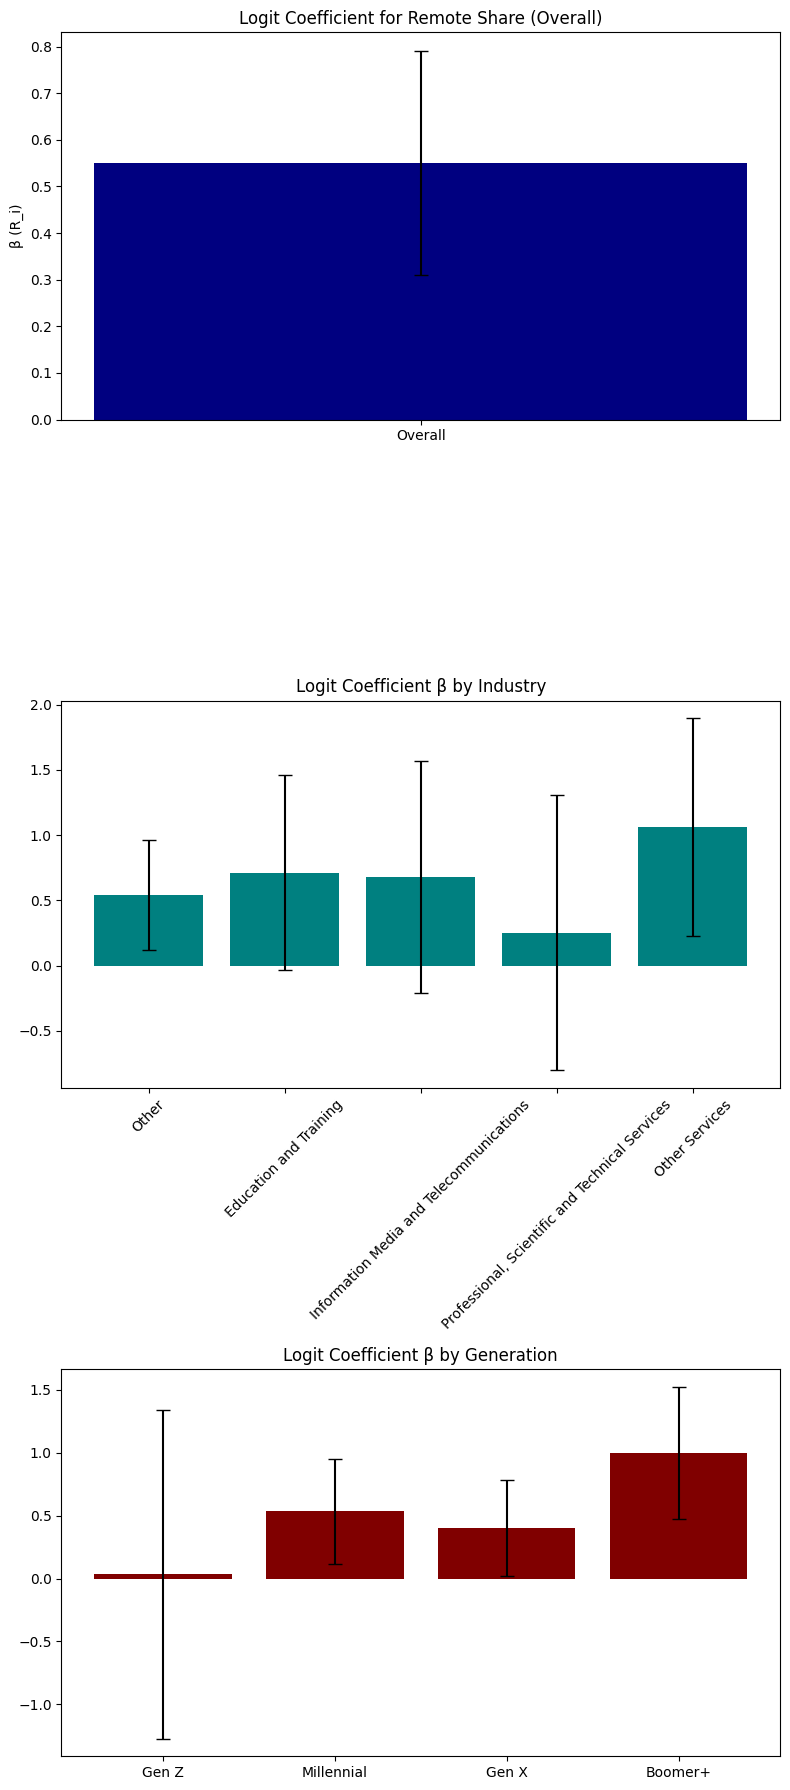

Overall Odds Ratio for Remote Share (unit R_i): 1.73× increase in odds of 'more productive'


In [83]:
import statsmodels.formula.api as smf


# ——————————————————————————————————————————————————————————————
#  Prepare the Cobb–Douglas inputs in your existing `df`
# ——————————————————————————————————————————————————————————————

# Remote share R_i from your "0-1 days"… "4-5 days" categories
day_map = {"0-1 days":0.5, "1-2 days":1.5, "2-3 days":2.5, "3-4 days":3.5, "4-5 days":4.5}
df['R_i'] = df['rw_percentage_2020'].map(day_map).div(5.0)

# Labor input L_i = total hours worked per day
df['L_i'] = (
    pd.to_numeric(df['remote_hours_working'], errors='coerce')
  + pd.to_numeric(df['inperson_hours__working'], errors='coerce')
)

# Capital proxy K_i = midpoint of your org-size buckets
size_map = {
  'Between 1 and 4':   2.5,
  'Between 5 and 19': 12.0,
  'Between 20 and 199':109.5,
  'More than 200':    300.0
}
df['K_i'] = df['organization_size'].map(size_map)

# Binary outcome Y_bin = 1 if employee reports "more" or "much more" productive
df['Y_bin'] = df['productivity_remote_vs_office'] \
                .isin(['more productive','much more productive']).astype(int)

# Drop missing so logs + logit work
df = df.dropna(subset=['R_i','L_i','K_i','Y_bin'])

# Derive generation if needed
if 'generation' not in df.columns:
    df['birth_year'] = pd.to_numeric(df['birth_year'], errors='coerce')
    def gen_of(y):
        if y>=1997: return 'Gen Z'
        if y>=1981: return 'Millennial'
        if y>=1965: return 'Gen X'
        return 'Boomer+'
    df['generation'] = df['birth_year'].apply(gen_of)


# ——————————————————————————————————————————————————————————————
#  Function to fit a simple logit and extract the R_i coefficient
# ——————————————————————————————————————————————————————————————
def estimate_logit(sub):
    # logit: Pr(Y_bin=1) = sigmoid(α + β·R_i + controls)
    m = smf.logit("Y_bin ~ R_i + np.log(L_i) + np.log(K_i)", data=sub).fit(disp=0)
    b    = m.params['R_i']
    lo, hi = m.conf_int().loc['R_i']
    odds = np.exp(b)
    return b, lo, hi, odds

# ——————————————————————————————————————————————————————————————
#  Compute for Overall, Top-5 Industries, and by Generation
# ——————————————————————————————————————————————————————————————
# Overall
b0, lo0, hi0, or0 = estimate_logit(df)

# Top 5 industries
top5 = df['industry_desc'].value_counts().nlargest(5).index
ind_res = [(ind, *estimate_logit(df[df['industry_desc']==ind])) for ind in top5]
ind_df = pd.DataFrame(ind_res, columns=['Industry','β','CI_lo','CI_hi','Odds']).set_index('Industry')

# Generation groups
gen_groups = ['Gen Z','Millennial','Gen X','Boomer+']
gen_res = [(g, *estimate_logit(df[df['generation']==g])) for g in gen_groups]
gen_df = pd.DataFrame(gen_res, columns=['Generation','β','CI_lo','CI_hi','Odds']).set_index('Generation')

# ——————————————————————————————————————————————————————————————
#  Plot the three‐panel “dashboard”
# ——————————————————————————————————————————————————————————————
fig, axes = plt.subplots(3,1, figsize=(8,18))

# Panel 1: Overall β (logit coefficient)
axes[0].bar(['Overall'], [b0], yerr=[[b0-lo0],[hi0-b0]], capsize=5, color='navy')
axes[0].set_title("Logit Coefficient for Remote Share (Overall)")
axes[0].set_ylabel("β (R_i)")

# Panel 2: by Industry
axes[1].bar(ind_df.index, ind_df['β'],
            yerr=[ind_df['β']-ind_df['CI_lo'], ind_df['CI_hi']-ind_df['β']],
            capsize=5, color='teal')
axes[1].set_title("Logit Coefficient β by Industry")
axes[1].tick_params(axis='x', rotation=45)

# Panel 3: by Generation
axes[2].bar(gen_df.index, gen_df['β'],
            yerr=[gen_df['β']-gen_df['CI_lo'], gen_df['CI_hi']-gen_df['β']],
            capsize=5, color='maroon')
axes[2].set_title("Logit Coefficient β by Generation")

plt.tight_layout()
plt.show()

# ——————————————————————————————————————————————————————————————
#  Print the overall odds‐ratio interpretation
# ——————————————————————————————————————————————————————————————
print(f"Overall Odds Ratio for Remote Share (unit R_i): {or0:.2f}× increase in odds of 'more productive'")